In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.3f}'.format

### Linear Regression with more features.

In [2]:
ds=datasets.load_diabetes()

In [3]:
df = pd.DataFrame(data=ds.data, columns=ds.feature_names)
df['response(y)'] = ds.target

In [4]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,response(y)
0,0.038,0.051,0.062,0.022,-0.044,-0.035,-0.043,-0.003,0.020,-0.018,151.000
1,-0.002,-0.045,-0.051,-0.026,-0.008,-0.019,0.074,-0.039,-0.068,-0.092,75.000
2,0.085,0.051,0.044,-0.006,-0.046,-0.034,-0.032,-0.003,0.003,-0.026,141.000
3,-0.089,-0.045,-0.012,-0.037,0.012,0.025,-0.036,0.034,0.023,-0.009,206.000
4,0.005,-0.045,-0.036,0.022,0.004,0.016,0.008,-0.003,-0.032,-0.047,135.000


In [5]:
print(ds['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  response(y)  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [7]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,response(y)
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,152.133
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,77.093
min,-0.107,-0.045,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138,25.000
25%,-0.037,-0.045,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033,87.000
50%,0.005,-0.045,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001,140.500
75%,0.038,0.051,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028,211.500
max,0.111,0.051,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136,346.000


Note that we have 10 features. If we want to apply linear regression here, we will have 10 parameters (for each feature) and a bias term. $$y^{(i)}= {\bf x^{(i)}} \cdot {\bf w} +b$$
Here, vector ${\bf w}$ contains all 10 parameters and vector ${\bf x^{(i)}}$ is values of $i$-th sample.

Let's combine all samples together to get:

$$X  {\bf w} +{\bf b} = {\bf y},$$

where ${\bf b}$ is a vector whose every entry is $b$.

Now, $X$ is a matrix consisisting of all of our data, where each row corresponds to a single sample and each column is a single feature. Make sure this product makes sense.

Finally, the loss function is

$$Loss = \frac{1}{N}||X  {\bf w} +{\bf b} -{\bf y}||^2$$

In the code below, when we create a linear model, we feed it number of features parameter, which is 10 in our case. The 1 the we feed it, is how many outputs we get for each sample. It is 1 again, because for each sample, we have a single value $y$ as the output.

In [8]:
X, y = datasets.load_diabetes(return_X_y=True)

In [10]:
X_trainN, X_testN, y_trainN, y_testN = train_test_split(X, y, test_size=0.30)

X_train=torch.from_numpy(X_trainN.astype(np.float32))
y_train=torch.from_numpy(y_trainN.astype(np.float32)).reshape(-1,1)
X_test=torch.from_numpy(X_testN.astype(np.float32))
y_test=torch.from_numpy(y_testN.astype(np.float32)).reshape(-1,1)

In [14]:
n_samples, n_features = X_train.shape

In [20]:
model=nn.Linear(n_features, 1)

lr=0.5
n_epoch=1000

lossfunc=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=lr)
train_loss=[]
test_loss=[]


for epoch in range(n_epoch):
    y_pred=model(X_train)
    loss=lossfunc(y_train, y_pred)
    loss.backward()
    train_loss.append(loss.item())
    optimizer.step()
    optimizer.zero_grad()

    [w,b]=model.parameters()

    with torch.inference_mode():
        y_test_pred=model(X_test)
        lost_test=lossfunc(y_test, y_test_pred)
        test_loss.append(lost_test)

    #print(f' epoch {epoch+1}: Train Loss = {loss:.3f}, Test Loss= {lost_test:.3f}')

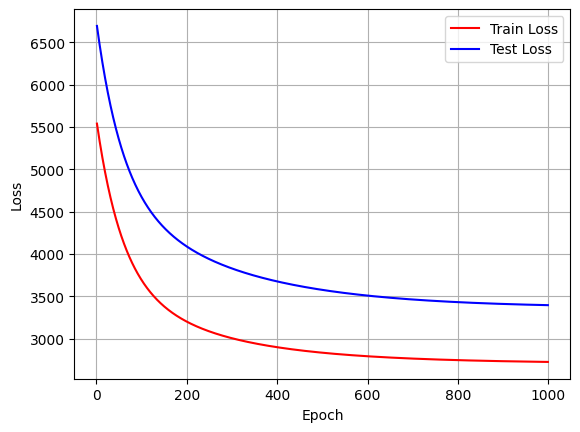

In [21]:
fig=plt.figure()
xv=np.arange(1, n_epoch,1)
plt.plot(xv,train_loss[1:], 'r', label="Train Loss")
plt.plot(xv,test_loss[:-1], 'b', label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
fig.show()

One way to measure how good is our linear fit is to use $R^2$ score (a.k.a Coefficient of determination or goodness of fit)

In [22]:
with torch.inference_mode():
    y_test_pred=model(X_test)
print('Coefficient of determination: %.2f' % r2_score(y_test, y_test_pred))

Coefficient of determination: 0.50


Let's compare this to Linear Regression found by using build-in sklearn function that uses direct way of computing linear regression.

In [23]:


regr = LinearRegression()
regr.fit(X_train, y_train)
pred = regr.predict(X_test)

print('Coefficient of determination: %.2f' % r2_score(y_test, pred))

Coefficient of determination: 0.49


### Polynomial Regression

Polynomial regression is a generalization of linear regression. Instead of trying to fit a line (which is a degree 1 polynomial), we fit a polynomial  curve of a certain degree: $$y=w_1x+w_2x^2+...+b$$ Notice this is quite similar to multi-feature linear regression: instead of different features we have different powers of $x$. And this is exactly how we are going to look at it. We will convert powers into features using `PolynomialFeatures`. Let's generate a random set and use degree 3 polynomial regression.



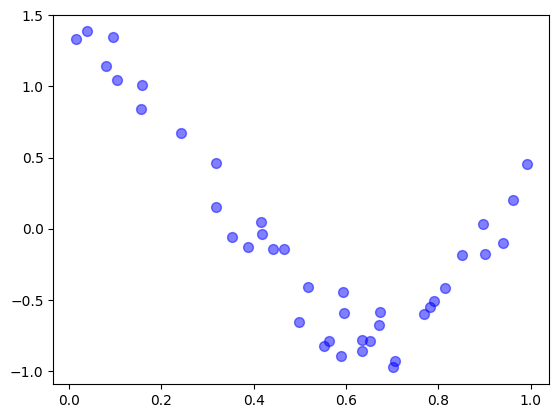

In [17]:
n_samples=40
X = np.random.rand(n_samples)
y=np.cos(1.5 * np.pi * X)+0.5*np.random.rand(n_samples)
X=X.reshape(-1,1)

fig=plt.figure()
plt.scatter(X,y, c='b', s=50, alpha=.5)
fig.show()

In [18]:
poly = PolynomialFeatures(degree=3, include_bias=True)
poly_features = poly.fit_transform(X)
poly_features[10], X[10]

(array([1.        , 0.55206701, 0.30477798, 0.16825787]), array([0.55206701]))

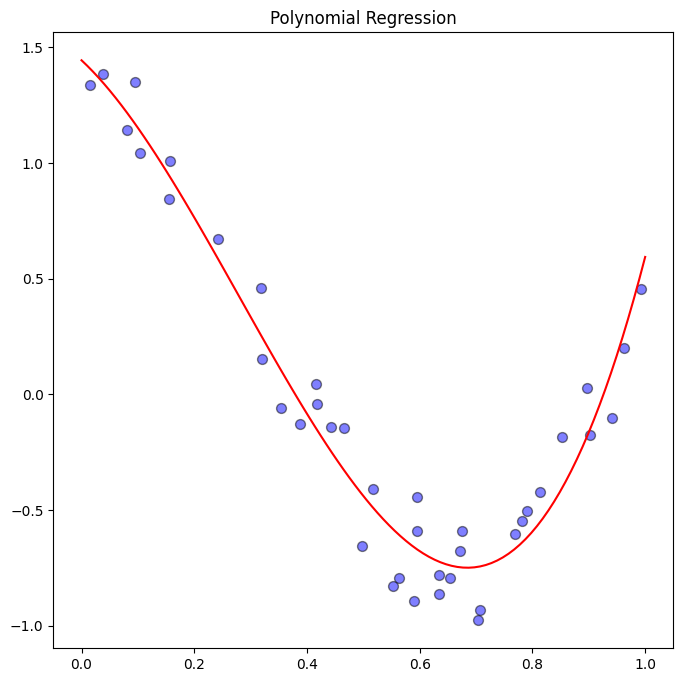

In [19]:
#create polynomial regression model
poly_model = LinearRegression()
poly_model.fit(poly_features, y)


#plot
fig=plt.figure(figsize=(8,8))

#get the regression curve
xv=np.linspace(0,1,100).reshape(-1,1)
xv_to_poly=poly.transform(xv)
y_pred = poly_model.predict(xv_to_poly)
plt.plot(xv, y_pred, '-r')

#add original data

plt.scatter(X,y, c='b', s=50, alpha=.5, edgecolor='k')

plt.title('Polynomial Regression')
plt.show()